### ensumble

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
test = pd.read_csv('../inputs/test.csv')
print(test.shape)

(8360, 11)


In [3]:
lgbm_out = pd.read_csv('../outputs/submission_lgbm_8.csv').rename(columns={'Global_Sales': 'lgbm'})
cat_out = pd.read_csv('../outputs/submission_cat.csv').rename(columns={'Global_Sales': 'cat'})
print(lgbm_out.shape)
print(cat_out.shape)

(8360, 1)
(8360, 1)


In [4]:
ensumble = pd.concat([lgbm_out, cat_out], axis=1)
ensumble.corr()

,lgbm,cat
lgbm,1.000000,0.942463
cat,0.942463,1.000000


In [5]:
x0= ensumble['lgbm']
y0 = ensumble['cat']
x1= np.log1p(x0)
y1 = np.log1p(y0)

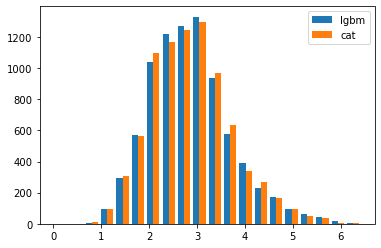

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist([x1, y1], bins=20, label=['lgbm', 'cat'])
ax.legend()

In [7]:
def plot_scatter(x, y, xlabel, ylabel):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x, y, alpha=0.5)
    ax.plot(x, x, color='black', linewidth=0.3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    maxvalue = max(x.max(), y.max())*1.05
    plt.xlim(0, maxvalue)
    plt.ylim(0, maxvalue)

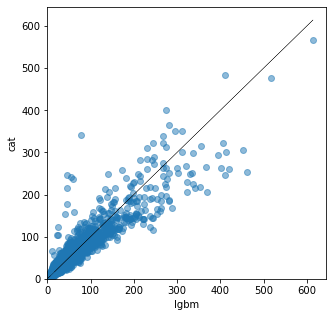

In [8]:
plot_scatter(x0, y0, 'lgbm', 'cat')

In [9]:
lgbm_rate = 0.5

In [10]:
ensumble['Global_Sales'] = (ensumble['lgbm']*lgbm_rate + ensumble['cat']*(1-lgbm_rate))
gsales = ensumble.drop(columns=['lgbm', 'cat'])
assert len(gsales) == len(test)
gsales.to_csv('../outputs/submission.csv', index=False)

print('- mean = {:.4f}'.format(gsales['Global_Sales'].mean()))
print('- max = {:.4f}'.format(gsales['Global_Sales'].max()))

- mean = 25.9503
- max = 590.2270


#### 30-3: lgbm 0.5 - cat 0.5
- feat = 975
- mean = 25.9503
- max = 590.2270
- lgbm = 0.8504 (lr=0.01, max_depth=8)
- cat = 0.8364
- corr = 0.942463
- LB= 0.8840

#### 30-2: 
- feat = 975
- mean = 25.7865
- max = 588.5373
- lgbm = 0.8493 (lr=0.01, max_depth=9)
- cat = 0.8364
- corr = 0.944568
- LB= 0.8866

#### 30-1: 
- feat = 975
- mean = 26.1815
- max = 558.3740
- lgbm = 0.8533 (lr=0.01, max_depth=6)
- cat = 0.8364
- corr = 0.938934
- LB= 0.8873

#### 30: 
- feat = 975
- mean = 26.0706
- max = 599.9416
- lgbm = 0.8504 (lr=0.01, max_depth=8)
- cat = 0.8364
- corr = 0.942463
- LB= 0.8856　★best★

#### 29: 
- feat = 985
- mean = 22.7269
- max = 583.3985
- lgbm = 0.8394
- cat = 0.8316
- corr = 0.932447
- LB= 0.919

#### 28: groupKfold -> StratifiedKFold
- feat = 1431
- mean = 25.9207
- max = 753.1347
- lgbm = 0.8525 (lr=0.01, max_depth=6)
- cat = 0.8369
- corr = 0.95026
- LB= 0.8987